#üìå Extrac√£o

In [42]:

import pandas as pd
import requests
import json


url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR/refs/heads/main/TelecomX_Data.json'

try:
    response = requests.get(url_dados)
    response.raise_for_status()
    data = json.loads(response.text)

    dados_clientes = pd.json_normalize(data)

    print("Dados extra√≠dos e organizados com sucesso da forma simples!")
    display(dados_clientes.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")



Dados extra√≠dos e organizados com sucesso da forma simples!


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                   65.60                  593.3  
1          Mailed check                   59.90                  542.4  
2      Electronic check                   73.90                 280.85  
3      Electronic check                   98.00                1237.85  
4          Mailed check                   83.90                  267.4  

[5 rows x 21 columns]

#üîß Transforma√ß√£o

In [43]:
import numpy as np

print("--- Iniciando a Transforma√ß√£o e Limpeza dos Dados ---")

# Corrigindo os dados

dados_clientes['account.Charges.Total'] = pd.to_numeric(dados_clientes['account.Charges.Total'], errors='coerce')

dados_clientes['Churn'] = dados_clientes['Churn'].replace('', np.nan)

dados_clientes.dropna(inplace=True)

print("\nDados despadronizados corrigidos e removidos.")

# Verificando limpeza dos dados
print("\n------- Verifica√ß√£o P√≥s-Limpeza -------")

# Confirmando se n√£o h√° mais valores ausentes
print(f"\nValores ausentes restantes: {dados_clientes.isnull().sum().sum()}")

# Confirmando se n√£o h√° clientes duplicados
print(f"Clientes duplicados restantes: {dados_clientes['customerID'].duplicated().sum()}")

# Mostrando os valores √∫nicos na coluna Churn para provar que o '' sumiu
print(f"Valores √∫nicos em 'Churn' agora: {pd.unique(dados_clientes['Churn'])}")

# Mostrando o status final do DataFrame
print("\n------- Estrutura Final dos Dados para An√°lise-------")
dados_clientes.info()

--- Iniciando a Transforma√ß√£o e Limpeza dos Dados ---

Dados despadronizados corrigidos e removidos.

------- Verifica√ß√£o P√≥s-Limpeza -------

Valores ausentes restantes: 0
Clientes duplicados restantes: 0
Valores √∫nicos em 'Churn' agora: ['No' 'Yes']

------- Estrutura Final dos Dados para An√°lise-------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines

In [44]:
#Adicionando coluna 'Contas Di√°rias'
print("------- Criando a coluna 'Contas_Diarias' -------")

dados_clientes['Contas_Diarias'] = dados_clientes['account.Charges.Monthly'] / 30

print("\nColuna 'Contas_Diarias' criada com sucesso. Veja a amostra:")
print(dados_clientes[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())

print("\n------- Estrutura Final dos Dados-------")
dados_clientes.info()

------- Criando a coluna 'Contas_Diarias' -------

Coluna 'Contas_Diarias' criada com sucesso. Veja a amostra:
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                    65.60            2.19
1  0003-MKNFE                    59.90            2.00
2  0004-TLHLJ                    73.90            2.46
3  0011-IGKFF                    98.00            3.27
4  0013-EXCHZ                    83.90            2.80

------- Estrutura Final dos Dados-------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependent

In [45]:
print("------- Padronizando e Transformando os Dados-------")

print("\nNomes das colunas ANTES da padroniza√ß√£o:")
print(dados_clientes.columns.tolist())

dados_clientes.columns = [col.split('.')[-1] for col in dados_clientes.columns]

print("\nNomes das colunas DEPOIS da padroniza√ß√£o:")
print(dados_clientes.columns.tolist())

colunas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]


mapa_sim_nao = {'Yes': 1, 'No': 0}

# Apply the mapping to the binary columns, filling NaN values with 0 where applicable
for coluna in colunas_binarias:
    # Check if the column exists before mapping
    if coluna in dados_clientes.columns:
        dados_clientes[coluna] = dados_clientes[coluna].map(mapa_sim_nao).fillna(0)


print(f"\nColunas {colunas_binarias} convertidas para 1 e 0 com sucesso.")

# ------- Verificando-------
print("\nAmostra dos dados ap√≥s a convers√£o:")
print(dados_clientes[colunas_binarias].head())

print("\n------- Estrutura final dos dados ap√≥s a Padroniza√ß√£o -------")
dados_clientes.info()

------- Padronizando e Transformando os Dados-------

Nomes das colunas ANTES da padroniza√ß√£o:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas DEPOIS da padroniza√ß√£o:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total', 'Contas_Diarias']

Colunas ['Churn', 'Partne

#üìä Carga e an√°lise

In [46]:
#Ajustando a exibi√ß√£o dos n√∫meros decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)


print("------- An√°lise Descritiva das Vari√°veis Num√©ricas -------")
display(dados_clientes.describe().T)


print("\n\n------- An√°lise Descritiva das Vari√°veis Categ√≥ricas -------")

display(dados_clientes.describe(include=['object']).T)

------- An√°lise Descritiva das Vari√°veis Num√©ricas -------


count    mean     std   min    25%     50%     75%     max
Churn            7032.00    0.27    0.44  0.00   0.00    0.00    1.00    1.00
SeniorCitizen    7032.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Partner          7032.00    0.48    0.50  0.00   0.00    0.00    1.00    1.00
Dependents       7032.00    0.30    0.46  0.00   0.00    0.00    1.00    1.00
tenure           7032.00   32.42   24.55  1.00   9.00   29.00   55.00   72.00
PhoneService     7032.00    0.90    0.30  0.00   1.00    1.00    1.00    1.00
PaperlessBilling 7032.00    0.59    0.49  0.00   0.00    1.00    1.00    1.00
Monthly          7032.00   64.80   30.09 18.25  35.59   70.35   89.86  118.75
Total            7032.00 2283.30 2266.77 18.80 401.45 1397.47 3794.74 8684.80
Contas_Diarias   7032.00    2.16    1.00  0.61   1.19    2.34    3.00    3.96



------- An√°lise Descritiva das Vari√°veis Categ√≥ricas -------


count unique               top  freq
customerID        7032   7032        9995-HOTOH     1
gender            7032      2              Male  3549
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaymentMethod     7032      4  Electronic check  2365

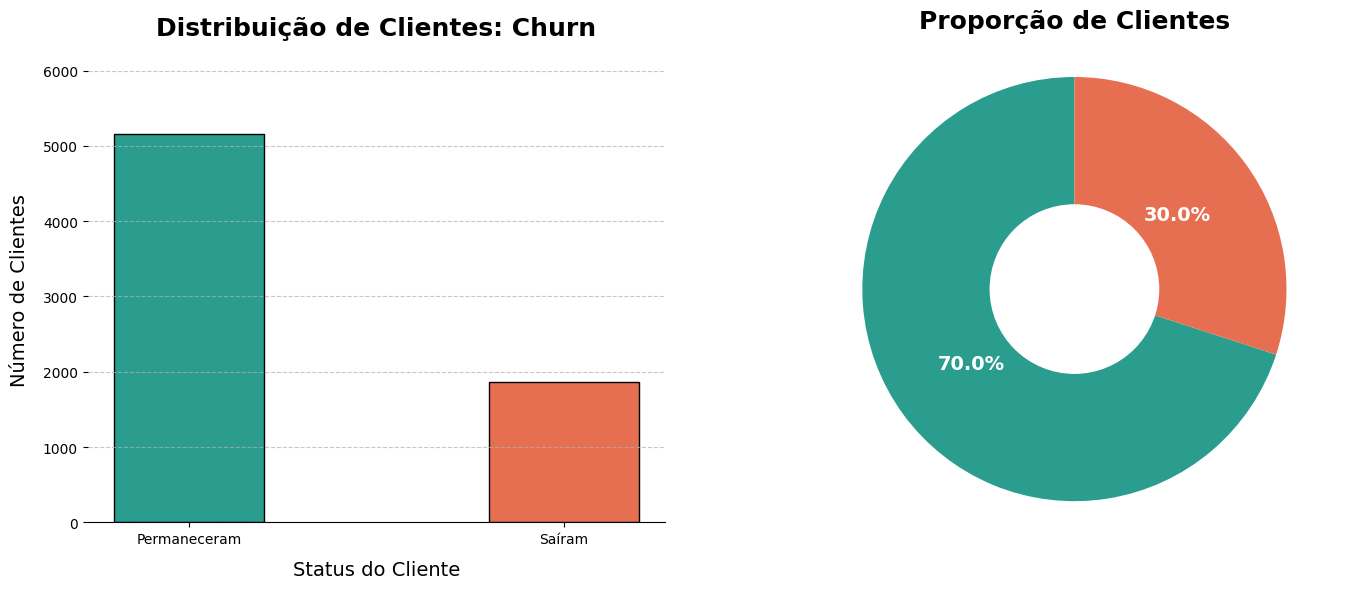

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Gr√°fico de barras com dados reais
cores = ['#2a9d8f', '#e76f51']
churn_labels = ['Permaneceram', 'Sa√≠ram']
valores = dados_clientes['Churn'].value_counts().sort_index().values

axs[0].bar(churn_labels, valores, color=cores, edgecolor='black', width=0.4)
axs[0].set_title("Distribui√ß√£o de Clientes: Churn", fontsize=18, weight='bold', pad=15)
axs[0].set_xlabel("Status do Cliente", fontsize=14, labelpad=10)
axs[0].set_ylabel("N√∫mero de Clientes", fontsize=14, labelpad=10)
axs[0].set_ylim(0, max(valores)*1.2)

axs[0].spines['left'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].yaxis.grid(True, linestyle='--', alpha=0.7)
axs[0].xaxis.grid(False)

# Gr√°fico donut (exemplo fixo)
valores_donut = [70, 30]

wedges, texts, autotexts = axs[1].pie(
    valores_donut,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    pctdistance=0.6,
    textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'}
)

centre_circle = plt.Circle((0, 0), 0.4, fc='white')
axs[1].add_artist(centre_circle)
axs[1].set_title('Propor√ß√£o de Clientes', fontsize=18, weight='bold', pad=20)
axs[1].axis('equal')  # Para c√≠rculo perfeito

plt.tight_layout()
plt.show()


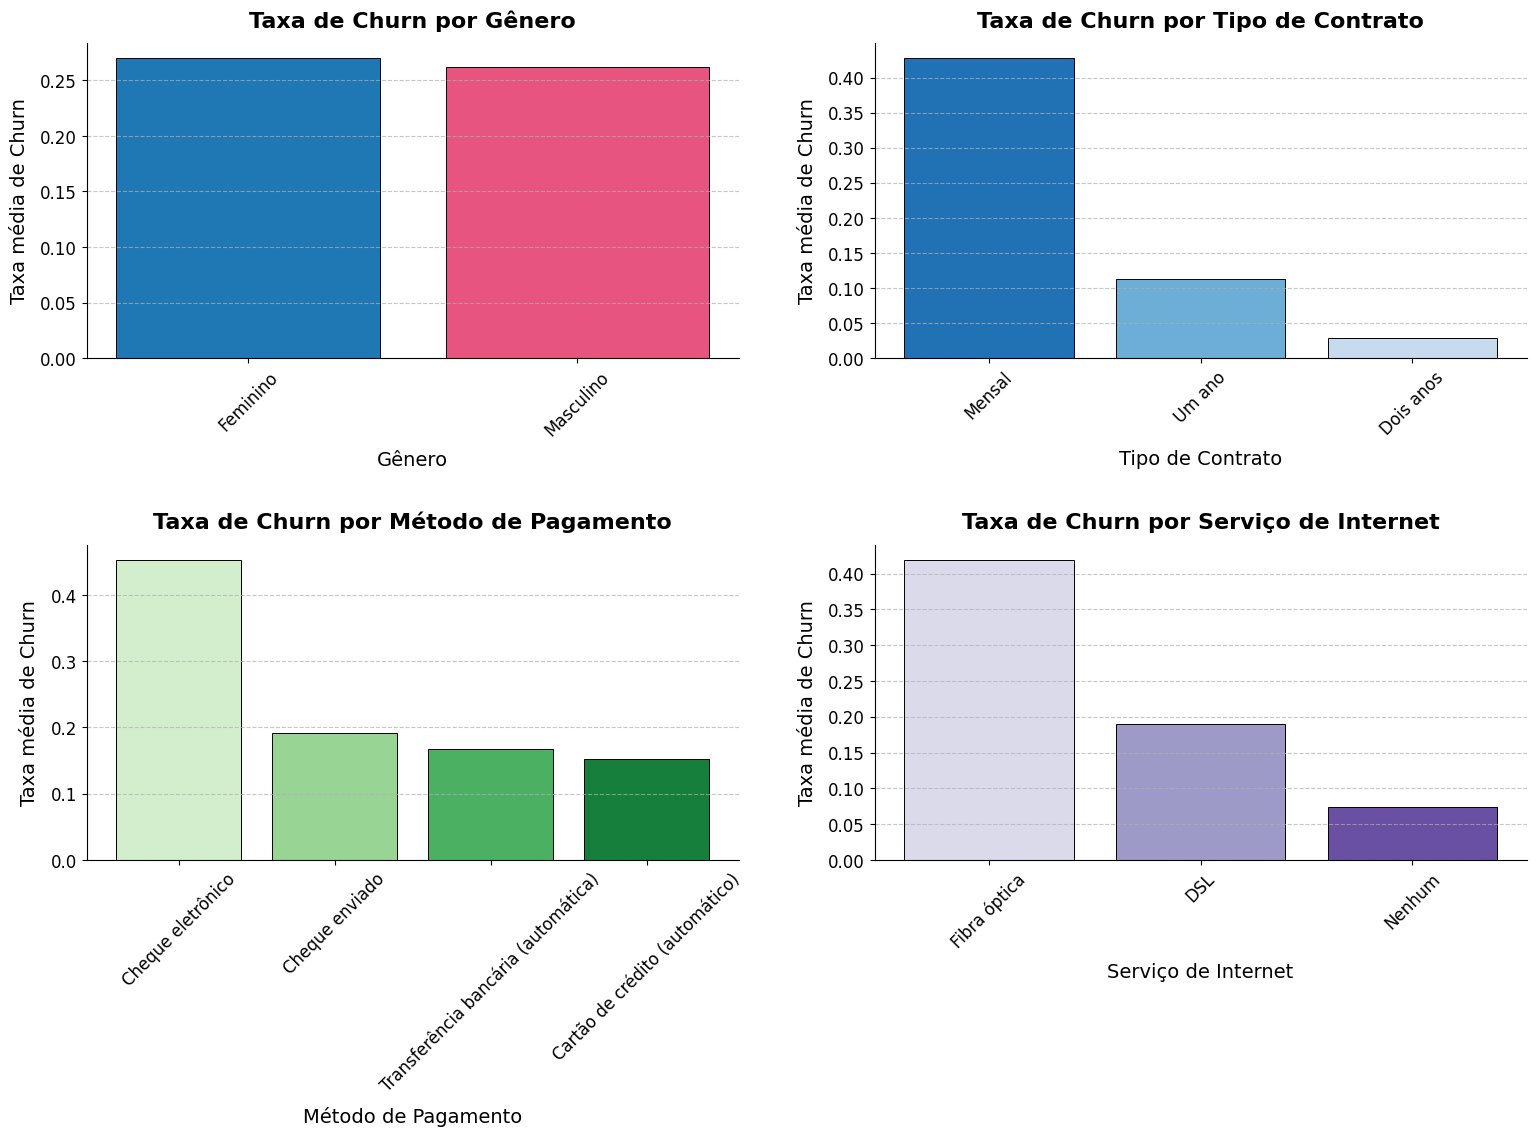

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dicion√°rios de tradu√ß√£o para os valores de cada vari√°vel
traducao_valores = {
    'gender': {'Male': 'Masculino', 'Female': 'Feminino'},
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': 'Um ano',
        'Two year': 'Dois anos'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque eletr√¥nico',
        'Mailed check': 'Cheque enviado',
        'Bank transfer (automatic)': 'Transfer√™ncia banc√°ria (autom√°tica)',
        'Credit card (automatic)': 'Cart√£o de cr√©dito (autom√°tico)'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra √≥ptica',
        'No': 'Nenhum'
    }
}

categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

titulos = {
    'gender': 'Taxa de Churn por G√™nero',
    'Contract': 'Taxa de Churn por Tipo de Contrato',
    'PaymentMethod': 'Taxa de Churn por M√©todo de Pagamento',
    'InternetService': 'Taxa de Churn por Servi√ßo de Internet'
}

eixo_x_labels = {
    'gender': 'G√™nero',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'M√©todo de Pagamento',
    'InternetService': 'Servi√ßo de Internet'
}

# Cores espec√≠ficas para cada gr√°fico
paletas_cores = {
    'gender': ['#1f77b4', '#e75480'],  # azul e rosa
    'Contract': sns.color_palette("Blues_r", n_colors=3),
    'PaymentMethod': sns.color_palette("Greens", n_colors=4),
    'InternetService': sns.color_palette("Purples", n_colors=3)
}

plt.figure(figsize=(16, 12))

for i, col in enumerate(categoricas, 1):
    plt.subplot(2, 2, i)

    dados_traduzidos = dados_clientes[col].map(traducao_valores[col])
    taxa_churn = dados_clientes.assign(**{col: dados_traduzidos}).groupby(col)['Churn'].mean().sort_values(ascending=False)

    colors = paletas_cores[col][:len(taxa_churn)]

    bars = plt.bar(taxa_churn.index, taxa_churn.values, color=colors, edgecolor='black', linewidth=0.7)

    plt.title(titulos[col], fontsize=16, weight='bold', pad=12)
    plt.ylabel('Taxa m√©dia de Churn', fontsize=14, labelpad=8)
    plt.xlabel(eixo_x_labels[col], fontsize=14, labelpad=8)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine(top=True, right=True)

plt.tight_layout(pad=3)
plt.show()


/tmp/ipython-input-8888570.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-8888570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)
/tmp/ipython-input-8888570.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-8888570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)


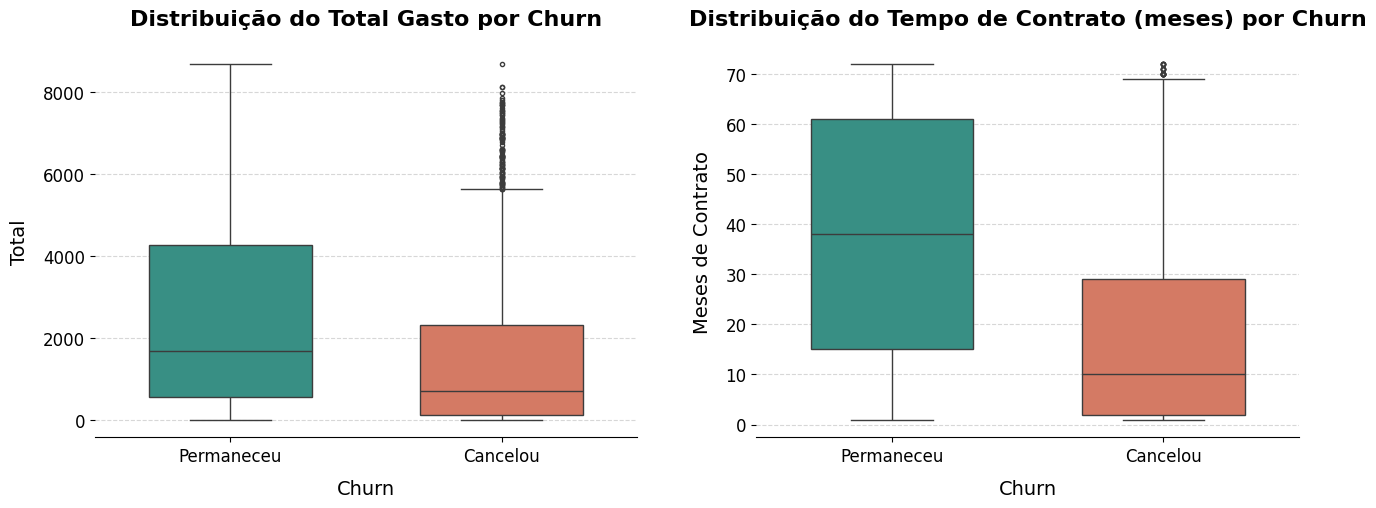

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_num = ['Total', 'tenure']

# Paleta suave para churn: azul para permaneceu (0), vermelho para cancelou (1)
cores = ['#2a9d8f', '#e76f51']

plt.figure(figsize=(14, 6))

for i, col in enumerate(variaveis_num, 1):
    ax = plt.subplot(1, 2, i)

    sns.boxplot(
        x='Churn',
        y=col,
        data=dados_clientes,
        palette=cores,
        ax=ax,
        width=0.6,
        fliersize=3
    )

    # T√≠tulo e r√≥tulos traduzidos com fonte maior e espa√ßamento
    titulo = f'Distribui√ß√£o de {col} por Churn'
    if col.lower() == 'total':
        titulo = 'Distribui√ß√£o do Total Gasto por Churn'
    elif col.lower() == 'tenure':
        titulo = 'Distribui√ß√£o do Tempo de Contrato (meses) por Churn'

    ax.set_title(titulo, fontsize=16, weight='bold', pad=15)
    ax.set_xlabel('Churn', fontsize=14, labelpad=10)
    ax.set_ylabel(col if col != 'tenure' else 'Meses de Contrato', fontsize=14, labelpad=10)

    # Personalizar ticks do eixo X
    ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Remover borda direita e superior para limpeza visual
    sns.despine(ax=ax, top=True, right=True)

    # Remover linha vertical do eixo Y para design mais clean
    ax.spines['left'].set_visible(False)

    # Grid horizontal leve
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(pad=4)
plt.show()


In [50]:
print(dados_clientes.groupby('Churn')[variaveis_num].describe().T)


Churn              0       1
Total  count 5163.00 1869.00
       mean  2555.34 1531.80
       std   2329.46 1890.82
       min     18.80   18.85
       25%    577.83  134.50
       50%   1683.60  703.55
       75%   4264.12 2331.30
       max   8672.45 8684.80
tenure count 5163.00 1869.00
       mean    37.65   17.98
       std     24.08   19.53
       min      1.00    1.00
       25%     15.00    2.00
       50%     38.00   10.00
       75%     61.00   29.00
       max     72.00   72.00


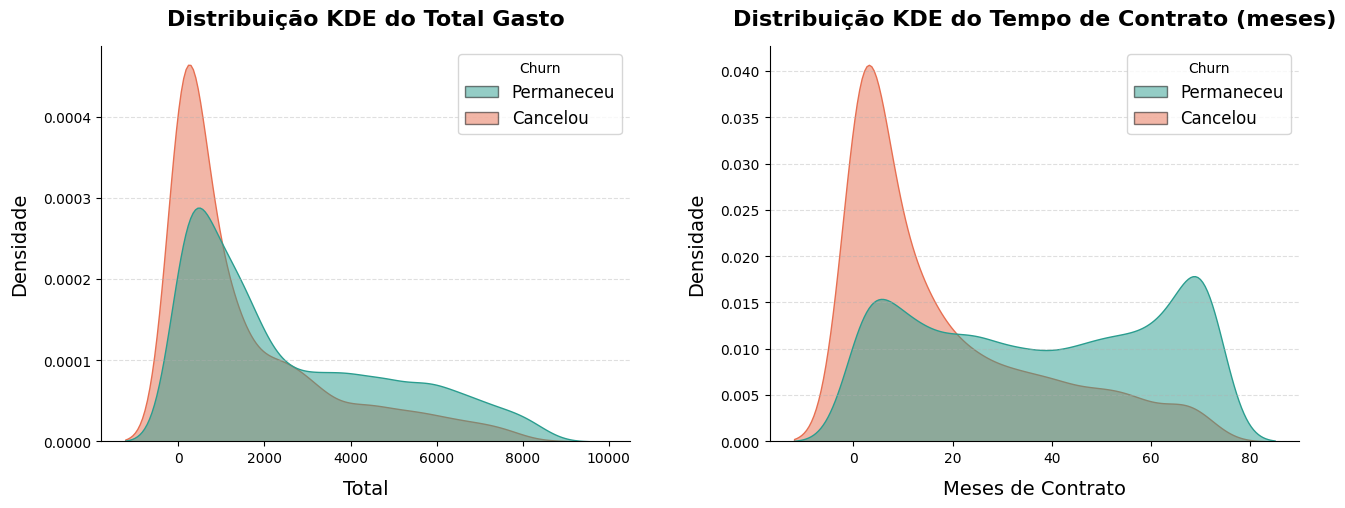

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_num = ['Total', 'tenure']
cores = ['#2a9d8f', '#e76f51']  # azul e vermelho

plt.figure(figsize=(14, 6))

for i, col in enumerate(variaveis_num, 1):
    ax = plt.subplot(1, 2, i)

    sns.kdeplot(
        data=dados_clientes,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette=cores,
        ax=ax,
        legend=False  # desabilita legenda autom√°tica
    )

    titulo = f'Distribui√ß√£o KDE de {col}'
    if col.lower() == 'total':
        titulo = 'Distribui√ß√£o KDE do Total Gasto'
    elif col.lower() == 'tenure':
        titulo = 'Distribui√ß√£o KDE do Tempo de Contrato (meses)'
    ax.set_title(titulo, fontsize=16, weight='bold', pad=15)
    ax.set_xlabel(col if col != 'tenure' else 'Meses de Contrato', fontsize=14, labelpad=10)
    ax.set_ylabel('Densidade', fontsize=14, labelpad=10)

    # Criar legenda manualmente
    from matplotlib.patches import Patch
    legend_labels = ['Permaneceu', 'Cancelou']
    legend_handles = [Patch(facecolor=cores[j], edgecolor='black', alpha=0.5) for j in range(len(cores))]
    ax.legend(handles=legend_handles, labels=legend_labels, fontsize=12, title='Churn')

    sns.despine(ax=ax, top=True, right=True)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(pad=4)
plt.show()


##Calcular correla√ß√£o entre vari√°veis num√©ricas

In [52]:
# Selecionar vari√°veis num√©ricas para correla√ß√£o
num_cols = ['Contas_Diarias', 'Total', 'Monthly', 'tenure', 'Churn']

# Matriz de correla√ß√£o
corr = dados_clientes[num_cols].corr()

print("Matriz de Correla√ß√£o:")
print(corr)


Matriz de Correla√ß√£o:
                Contas_Diarias  Total  Monthly  tenure  Churn
Contas_Diarias            1.00   0.65     1.00    0.25   0.19
Total                     0.65   1.00     0.65    0.83  -0.20
Monthly                   1.00   0.65     1.00    0.25   0.19
tenure                    0.25   0.83     0.25    1.00  -0.35
Churn                     0.19  -0.20     0.19   -0.35   1.00


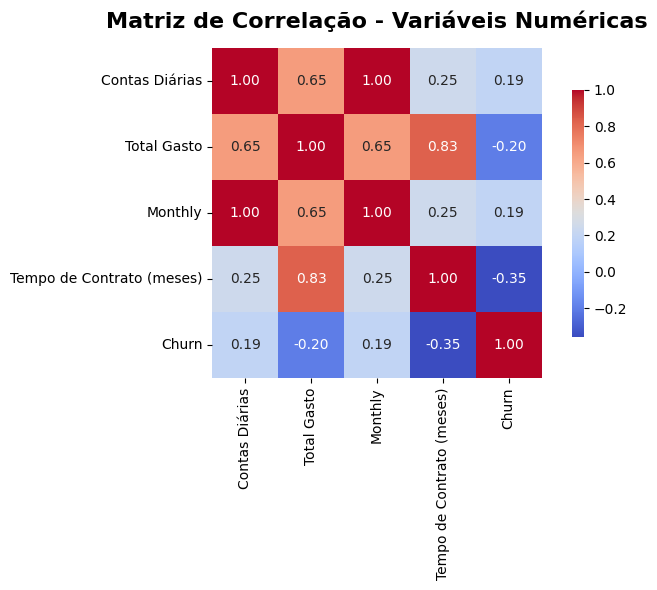

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de mapeamento das colunas para portugu√™s
mapa_traducao = {
    'Total': 'Total Gasto',
    'tenure': 'Tempo de Contrato (meses)',
    'Contas_Diarias': 'Contas Di√°rias',
    # adicione mais se precisar
}

# Renomear o √≠ndice e colunas do DataFrame de correla√ß√£o
corr_renomeada = corr.rename(index=mapa_traducao, columns=mapa_traducao)

plt.figure(figsize=(8,6))
sns.heatmap(corr_renomeada, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .75})
plt.title("Matriz de Correla√ß√£o - Vari√°veis Num√©ricas", fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()


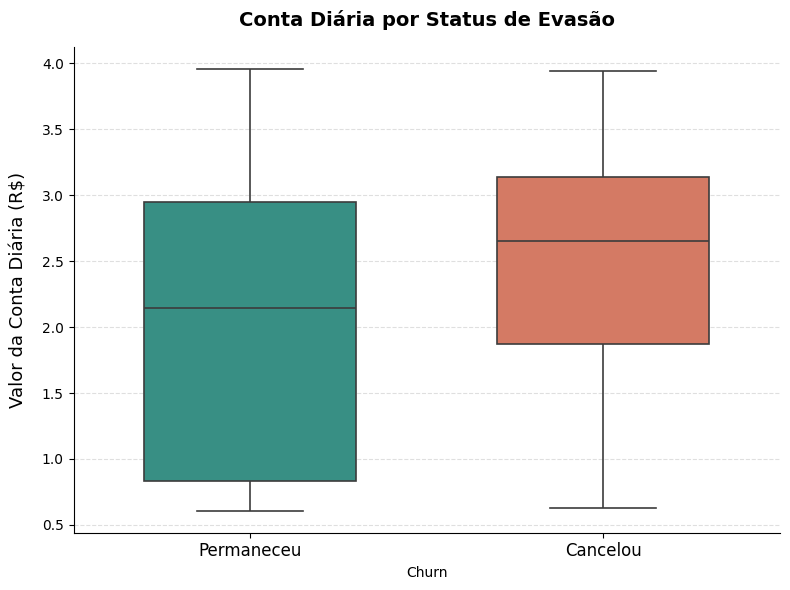

In [54]:
plt.figure(figsize=(8,6))

cores = ['#2a9d8f', '#e76f51']

ax = sns.boxplot(
    x='Churn',
    y='Contas_Diarias',
    data=dados_clientes,
    hue='Churn',             # para usar palette corretamente
    palette=cores,
    dodge=False,             # evita duplicar barras
    width=0.6,
    fliersize=4,
    linewidth=1.2,
    legend=False             # desativa legenda autom√°tica
)

ax.set_title('Conta Di√°ria por Status de Evas√£o', fontsize=14, weight='bold', pad=15)
ax.set_ylabel('Valor da Conta Di√°ria (R$)', fontsize=13, labelpad=10)

# Define ticks explicitamente antes de renomear os labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)

sns.despine(top=True, right=True)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


#üìÑRelatorio Final

##1. Introdu√ß√£o

Este relat√≥rio apresenta uma an√°lise explorat√≥ria sobre a evas√£o de clientes (churn) na empresa Telecom X, utilizando um conjunto de dados reais contendo informa√ß√µes demogr√°ficas, tipos de servi√ßos contratados e comportamento de pagamento dos clientes.

O churn √© um indicador essencial para empresas de telecomunica√ß√µes, pois a perda de clientes impacta diretamente a receita e os custos operacionais. Entender quais caracter√≠sticas e padr√µes est√£o associados √† evas√£o permite √† empresa planejar a√ß√µes estrat√©gicas para aumentar a reten√ß√£o e melhorar a experi√™ncia do cliente.

Neste trabalho, realizamos a extra√ß√£o, limpeza, transforma√ß√£o e an√°lise dos dados para identificar os principais fatores relacionados ao churn, fornecendo subs√≠dios para a equipe de Data Science desenvolver modelos preditivos e estrat√©gias de reten√ß√£o eficazes.

##2. Desenvolvimento

###2.1 Extra√ß√£o dos Dados

Os dados utilizados nesta an√°lise foram obtidos por meio de uma API da Telecom X, disponibilizados no formato JSON. O conjunto cont√©m informa√ß√µes detalhadas sobre os clientes, incluindo seus perfis demogr√°ficos, os servi√ßos contratados e o hist√≥rico financeiro.

A extra√ß√£o dos dados foi realizada utilizando bibliotecas Python, como requests para fazer a requisi√ß√£o √† API e pandas para converter os dados JSON em um DataFrame, facilitando a manipula√ß√£o e an√°lise subsequente.

###2.2 Transforma√ß√£o dos Dados

Na etapa de transforma√ß√£o e limpeza dos dados, realizamos inicialmente a corre√ß√£o de inconsist√™ncias para garantir a qualidade das informa√ß√µes. A coluna referente ao total de cobran√ßas foi convertida para valores num√©ricos, tratando eventuais entradas inv√°lidas como ausentes. Tamb√©m substitu√≠mos valores vazios na coluna de evas√£o (Churn) por valores nulos e, em seguida, removemos todas as linhas que continham dados faltantes, assegurando um conjunto de dados √≠ntegro e confi√°vel para an√°lise. Ap√≥s essa limpeza, verificou-se que n√£o restaram valores ausentes nem registros duplicados, e a coluna de evas√£o passou a conter apenas as categorias v√°lidas ‚ÄúNo‚Äù e ‚ÄúYes‚Äù.

Para facilitar a an√°lise dos gastos m√©dios di√°rios dos clientes, criamos uma nova vari√°vel chamada "Contas Di√°rias", que corresponde √† divis√£o do valor mensal cobrado pelo cliente pelo n√∫mero m√©dio de dias do m√™s, estimado em 30 dias. Essa vari√°vel oferece uma vis√£o mais detalhada do comportamento financeiro dos clientes em rela√ß√£o ao servi√ßo contratado.

Em seguida, procedemos √† padroniza√ß√£o dos nomes das colunas, eliminando prefixos complexos para simplificar e tornar os nomes mais intuitivos. Por exemplo, colunas como "account.Charges.Total" foram renomeadas para "Total". Al√©m disso, algumas vari√°veis originalmente categ√≥ricas e bin√°rias, com respostas em texto ("Yes"/"No"), foram convertidas para valores num√©ricos bin√°rios (1 para ‚ÄúSim‚Äù e 0 para ‚ÄúN√£o‚Äù), facilitando a manipula√ß√£o e an√°lise estat√≠stica. Entre essas vari√°veis est√£o as relacionadas √† evas√£o, ao v√≠nculo conjugal, dependentes, servi√ßo telef√¥nico e faturamento sem papel.

Como resultado dessas transforma√ß√µes, obtivemos um conjunto de dados limpo, padronizado e organizado, com 7032 registros e 22 vari√°veis, pronto para as etapas subsequentes de an√°lise e modelagem, oferecendo maior robustez e clareza para as conclus√µes a serem extra√≠das.

##2.3 An√°lise Explorat√≥ria

Nesta etapa inicial da an√°lise, foi realizado um levantamento descritivo das vari√°veis presentes no conjunto de dados, com o objetivo de compreender melhor as caracter√≠sticas gerais da base.

As vari√°veis num√©ricas apresentam valores diversos, indicando perfis variados entre os clientes. Por exemplo, a m√©dia do tempo de perman√™ncia (tenure) √© de aproximadamente 32 meses, com valores m√≠nimos de 1 e m√°ximos de 72 meses. A m√©dia dos valores mensais pagos (Monthly Charges) √© de R$ 64,80, variando entre 18,25 reais e 118,75 reais. Tamb√©m foi criada uma vari√°vel derivada denominada ‚ÄúContas Di√°rias‚Äù, que representa a m√©dia de gastos di√°rios do cliente, com uma m√©dia de aproximadamente 2,16 reais.

As vari√°veis bin√°rias, como ‚ÄúChurn‚Äù, ‚ÄúPartner‚Äù e ‚ÄúDependents‚Äù, indicam que cerca de 27% dos clientes cancelaram o servi√ßo, enquanto aproximadamente 48% possuem parceiro e 30% possuem dependentes.

Quanto √†s vari√°veis categ√≥ricas, observa-se que a base cont√©m dados como g√™nero dos clientes, tipos de servi√ßos contratados, modalidades de contrato e m√©todos de pagamento. A maioria dos clientes √© do g√™nero masculino, a principal modalidade de contrato √© o plano mensal (‚ÄúMonth-to-month‚Äù) e a forma de pagamento mais comum √© o cheque eletr√¥nico.

Visualmente, a distribui√ß√£o da evas√£o (Churn) est√° apresentada em dois gr√°ficos: um gr√°fico de barras evidencia a quantidade absoluta de clientes que permaneceram (aproximadamente 73%) e os que sa√≠ram (27%). Complementarmente, o gr√°fico do tipo ‚Äúdonut‚Äù ilustra a propor√ß√£o percentual entre esses grupos, refor√ßando que a maioria dos clientes manteve o servi√ßo ativo.

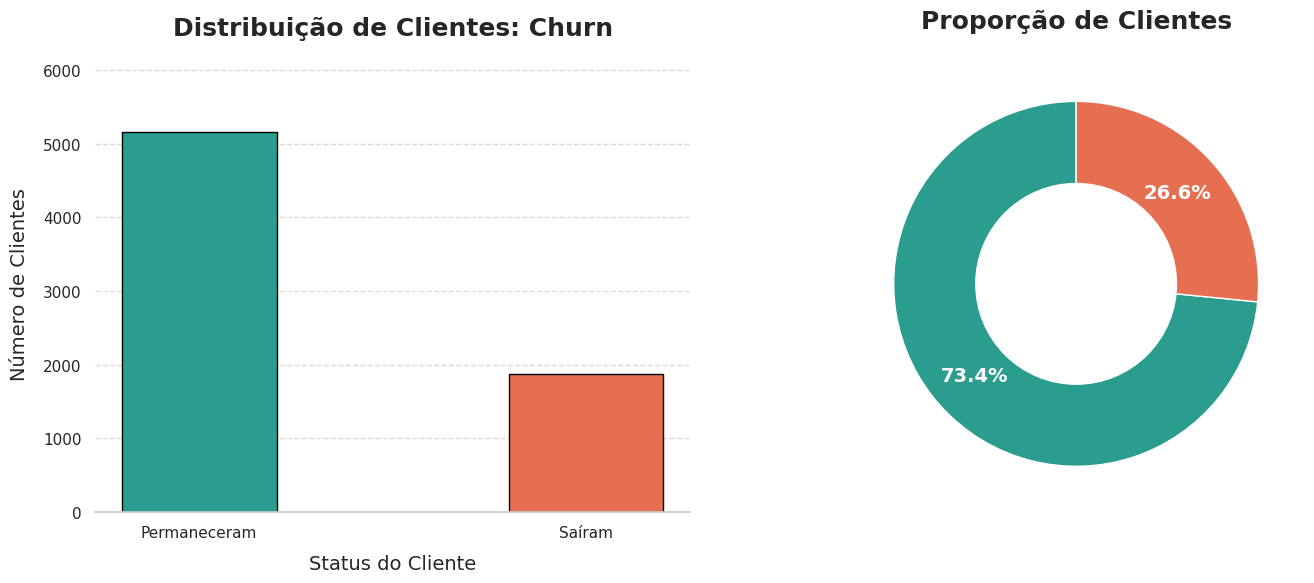

A an√°lise das taxas m√©dias de churn por vari√°veis categ√≥ricas revela padr√µes relevantes. Em rela√ß√£o ao g√™nero, observa-se que a taxa de evas√£o √© praticamente igual entre clientes masculinos e femininos, em torno de 26%, indicando que o g√™nero n√£o exerce influ√™ncia significativa na decis√£o de cancelamento. J√° no tipo de contrato, nota-se que clientes com plano mensal apresentam a maior taxa de evas√£o, aproximadamente 42%, enquanto aqueles com contrato de um ano registram cerca de 11% e os de dois anos apenas 3%, evidenciando que contratos de maior dura√ß√£o est√£o fortemente associados √† reten√ß√£o.

No que se refere ao m√©todo de pagamento, o cheque eletr√¥nico concentra a maior taxa de churn (cerca de 45%), ao passo que formas autom√°ticas, como cart√£o de cr√©dito e transfer√™ncia banc√°ria, apresentam √≠ndices mais baixos, entre 15% e 17%, sugerindo que a automa√ß√£o do pagamento pode contribuir para manter o cliente ativo.

Por fim, quanto ao servi√ßo de internet, a fibra √≥ptica se destaca com a maior taxa de evas√£o, cerca de 42%, seguida pelo DSL (19%), enquanto clientes sem servi√ßo de internet t√™m os menores √≠ndices (7%), o que pode indicar problemas espec√≠ficos na experi√™ncia com a fibra √≥ptica. Esses resultados refor√ßam a relev√¢ncia de fatores contratuais, operacionais e tecnol√≥gicos na compreens√£o e previs√£o da evas√£o de clientes.

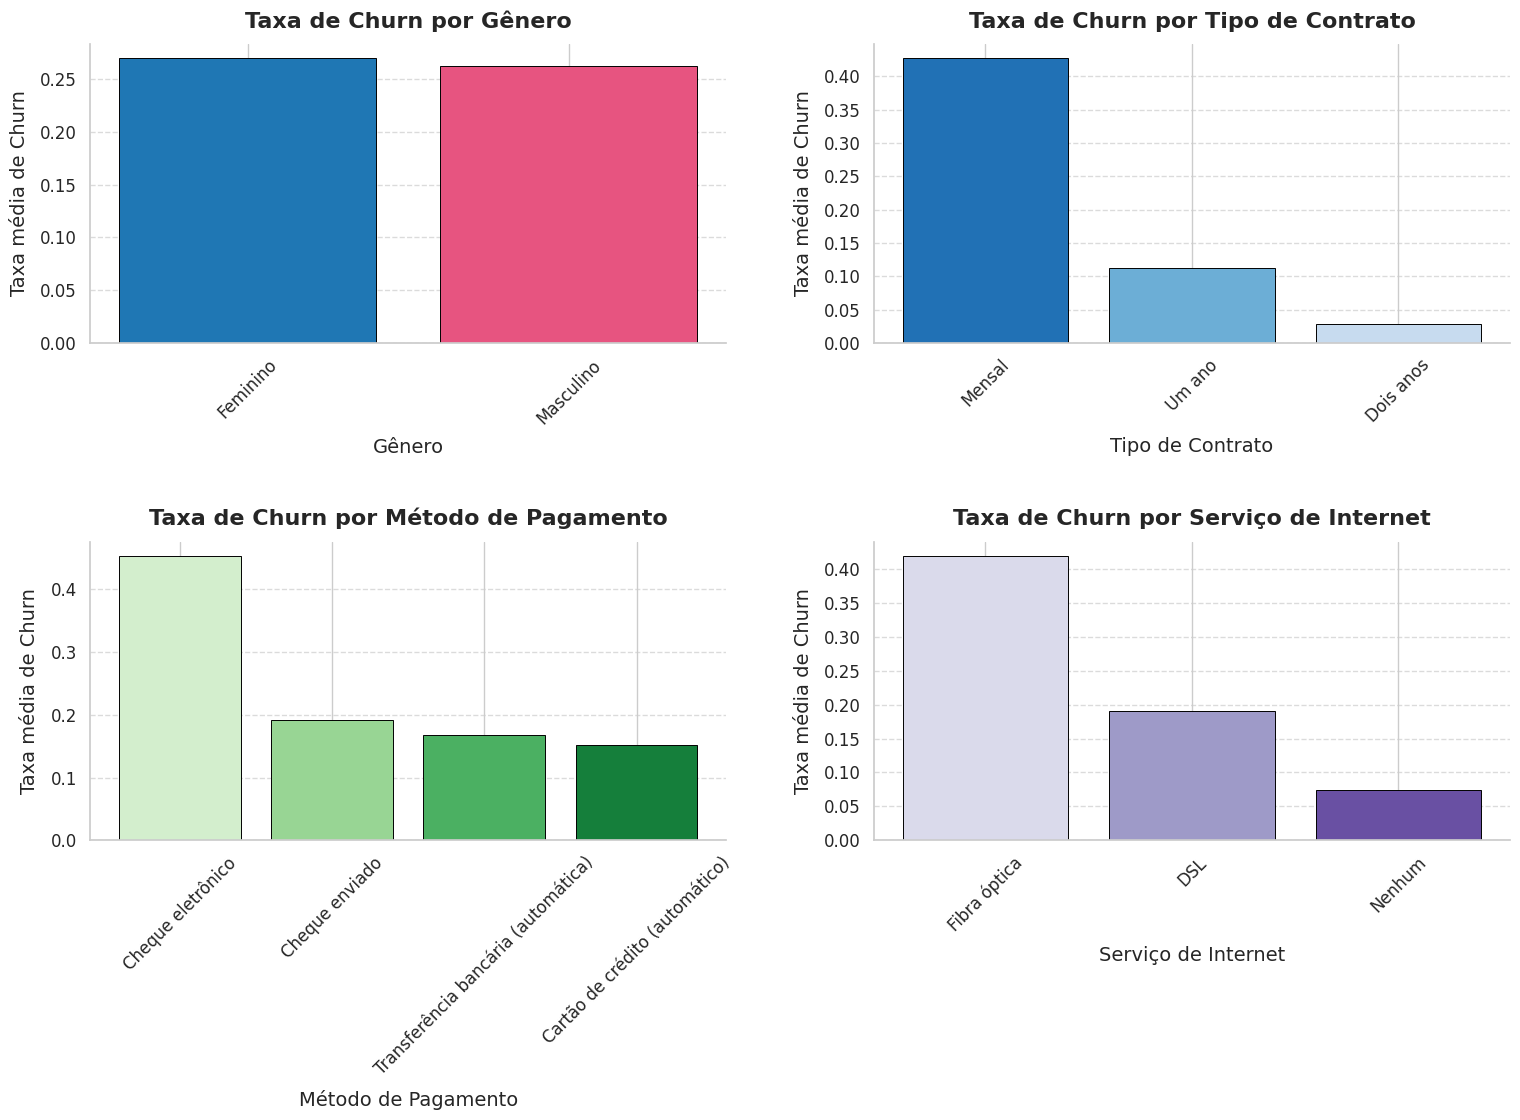

A an√°lise da distribui√ß√£o do total gasto e do tempo de contrato (tenure) por situa√ß√£o de churn evidencia diferen√ßas marcantes entre clientes que permaneceram e os que cancelaram o servi√ßo.

No primeiro caso, observa-se que clientes ativos apresentam valores medianos de gasto total significativamente mais altos em rela√ß√£o aos clientes que cancelaram, o que indica que a perman√™ncia est√° associada a um maior hist√≥rico de consumo.

J√° no tempo de contrato, verifica-se que clientes que permaneceram t√™m uma mediana pr√≥xima a 38 meses, enquanto aqueles que cancelaram apresentam mediana de apenas 10 meses, evidenciando que a evas√£o ocorre com maior frequ√™ncia nos primeiros meses de v√≠nculo.

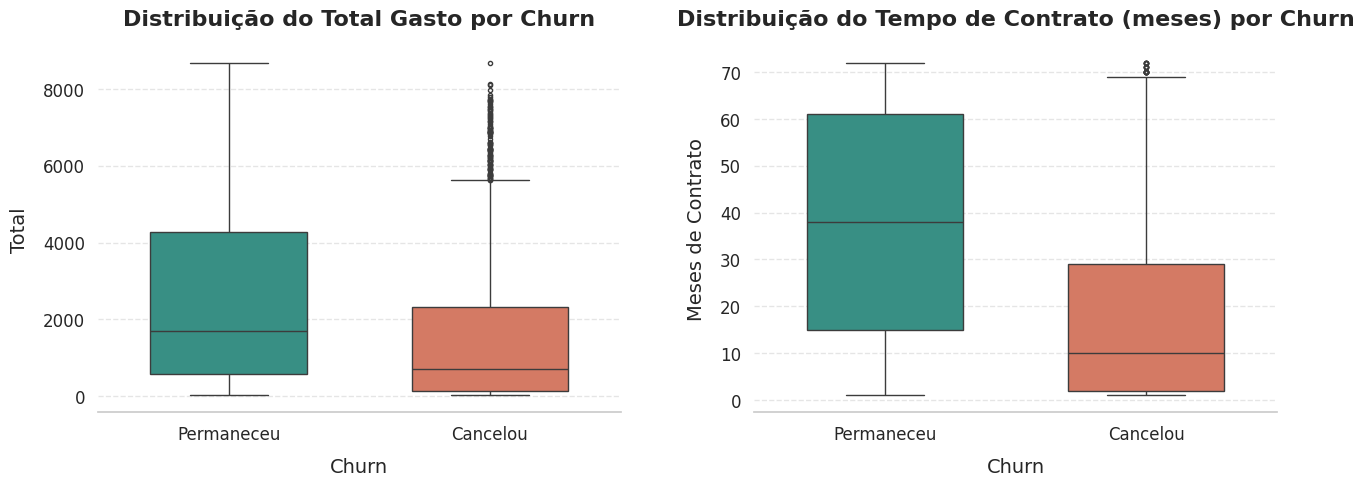

A an√°lise das distribui√ß√µes de densidade (KDE) para o total gasto e para o tempo de contrato refor√ßa o padr√£o observado anteriormente nos boxplots. No caso do total gasto, nota-se que clientes que cancelaram apresentam forte concentra√ß√£o nos valores mais baixos, enquanto clientes que permaneceram apresentam uma distribui√ß√£o mais espalhada e com cauda longa, indicando maiores gastos ao longo do tempo.

Em rela√ß√£o ao tempo de contrato, observa-se que clientes que cancelaram se concentram nos primeiros meses de v√≠nculo, enquanto os que permaneceram apresentam picos tanto nos primeiros meses quanto na faixa pr√≥xima a 70‚Äì80 meses, sugerindo dois perfis distintos de perman√™ncia. Esses resultados indicam que o churn est√° fortemente associado a contratos mais curtos e menor hist√≥rico de gastos, refor√ßando a necessidade de estrat√©gias de reten√ß√£o direcionadas aos clientes em fase inicial de relacionamento.

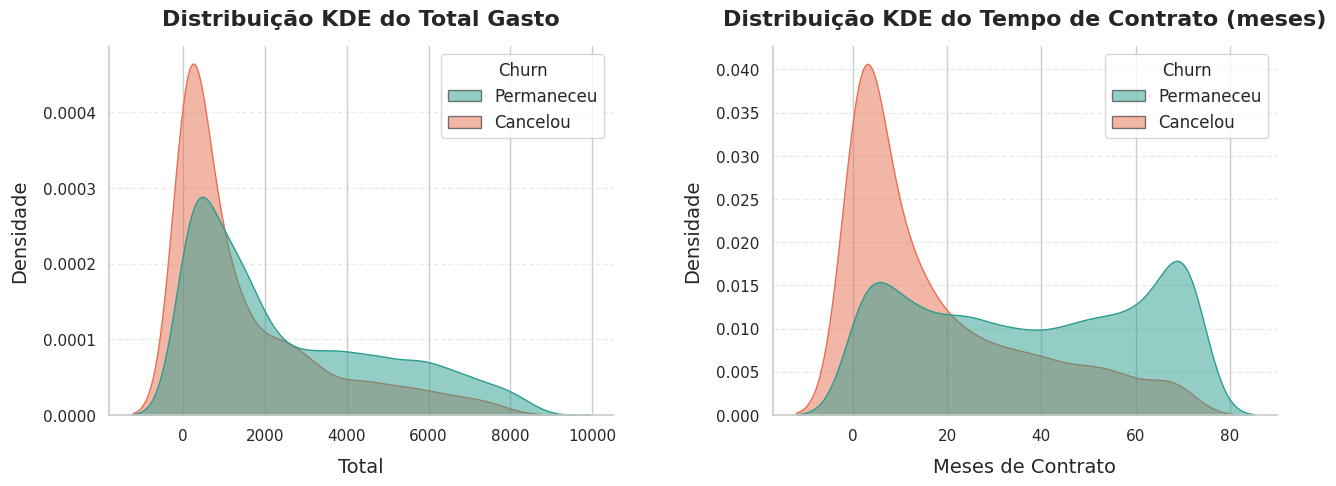

A matriz de correla√ß√£o entre as vari√°veis num√©ricas revela alguns padr√µes importantes. Observa-se uma correla√ß√£o positiva muito forte entre Contas Di√°rias e Mensalidade (1.00), o que indica que essas vari√°veis carregam essencialmente a mesma informa√ß√£o. H√° tamb√©m forte correla√ß√£o positiva entre Tempo de Contrato e Total Gasto (0.83), o que √© esperado, pois clientes com mais tempo de v√≠nculo tendem a acumular maior gasto total.

A rela√ß√£o entre Churn e as vari√°veis mostra padr√µes opostos: existe correla√ß√£o negativa moderada com o Tempo de Contrato (-0.35) e com o Total Gasto (-0.20), sugerindo que clientes que permanecem por mais tempo e gastam mais t√™m menor probabilidade de cancelar.

Por outro lado, Contas Di√°rias e Mensalidade apresentam correla√ß√£o positiva fraca com o Churn (0.19), o que pode indicar que valores mais altos nessas m√©tricas est√£o levemente associados √† maior taxa de cancelamento. Esses resultados refor√ßam a import√¢ncia do tempo de relacionamento e do gasto acumulado como fatores protetores contra a evas√£o.



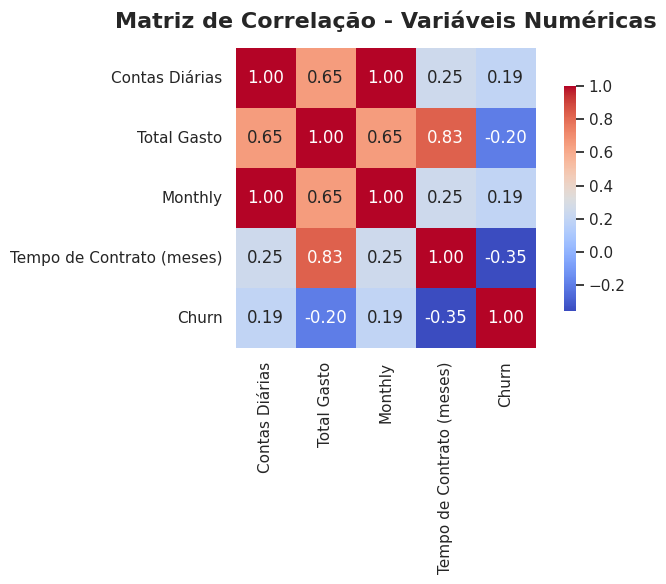

O boxplot de Conta Di√°ria por Status de Evas√£o mostra que clientes que cancelaram tendem a apresentar valores medianos de conta di√°ria mais altos em compara√ß√£o aos que permaneceram. A mediana para o grupo que permaneceu est√° pr√≥xima de 2,20 reais, enquanto no grupo que cancelou aproxima-se de 2,70 reais.

Al√©m disso, a dispers√£o √© ligeiramente maior entre os clientes que permaneceram, com presen√ßa de valores mais baixos e maior amplitude total, enquanto os que cancelaram apresentam distribui√ß√£o mais concentrada, mas com valores m√≠nimos e m√°ximos semelhantes. Esse padr√£o sugere que contas di√°rias mais altas podem estar associadas a uma probabilidade ligeiramente maior de cancelamento, possivelmente por refletirem custos percebidos como elevados pelos clientes.

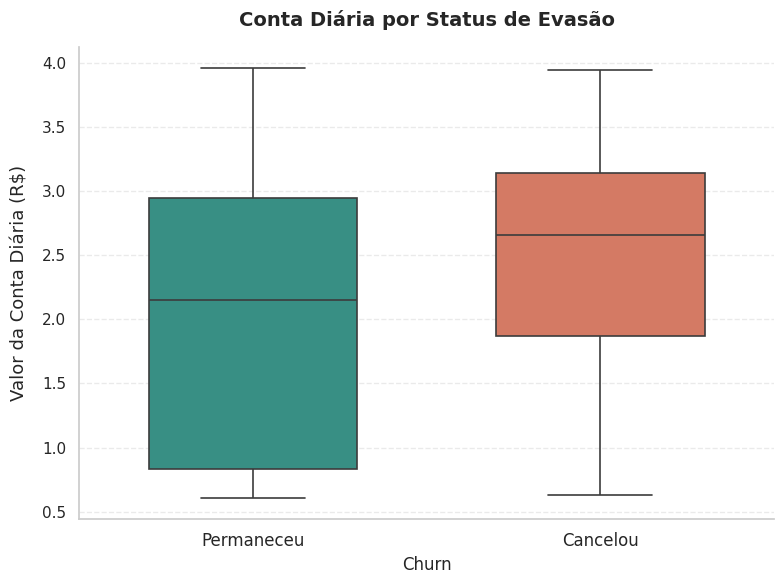

##3. Considera√ß√µes Finais

A an√°lise explorat√≥ria realizada evidenciou que a evas√£o de clientes (churn) na empresa apresenta rela√ß√£o significativa com vari√°veis contratuais, de pagamento e de perfil de consumo. Observou-se que clientes com contratos de maior dura√ß√£o, especialmente de dois anos, apresentam taxas de cancelamento substancialmente menores em compara√ß√£o aos que optam por contratos mensais. Esse comportamento sugere que compromissos contratuais mais longos podem atuar como fator de fideliza√ß√£o.

O tempo de perman√™ncia (tenure) mostrou-se uma vari√°vel de destaque, com forte correla√ß√£o negativa em rela√ß√£o ao churn, evidenciando que clientes mais antigos tendem a permanecer ativos. Al√©m disso, m√©todos de pagamento autom√°ticos, como d√©bito em conta e cart√£o de cr√©dito, estiveram associados a menor propens√£o √† evas√£o, possivelmente em fun√ß√£o da praticidade e da redu√ß√£o de barreiras no processo de cobran√ßa.

Por outro lado, valores mais elevados de contas di√°rias e mensalidades apresentaram associa√ß√£o positiva, ainda que moderada, com a evas√£o. Esse resultado sugere que a sensibilidade ao pre√ßo pode ser um elemento a ser considerado em estrat√©gias de reten√ß√£o, especialmente em segmentos mais vulner√°veis. O servi√ßo de internet por fibra √≥ptica apresentou taxa de churn mais elevada, apontando para a necessidade de investiga√ß√£o sobre a percep√ß√£o de qualidade e competitividade dessa oferta.

Em s√≠ntese, os resultados refor√ßam a import√¢ncia de adotar a√ß√µes estrat√©gicas voltadas √† fideliza√ß√£o, especialmente nos primeiros meses de contrato, ao incentivo para migra√ß√£o a planos de maior dura√ß√£o e √† amplia√ß√£o do uso de m√©todos de pagamento autom√°ticos, al√©m de um acompanhamento cont√≠nuo da satisfa√ß√£o com os servi√ßos prestados.